# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how="outer", on='Mouse ID')
# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
combined_data['Mouse ID'].value_counts()

g989    13
c766    10
k894    10
o926    10
l897    10
        ..
t573     1
o848     1
u153     1
v199     1
h428     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_df = combined_data.set_index("Mouse ID")

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_df.loc["g989"]

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=mouse_df.drop(['g989'])
clean_df.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
final_df = clean_df.reset_index()
final_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
final_df['Mouse ID'].value_counts()

x581    10
j296    10
o926    10
l897    10
j913    10
        ..
t573     1
o848     1
u153     1
v199     1
h428     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [8]:
summary_df=final_df.groupby('Drug Regimen')
summary_df

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_mean = summary_df['Tumor Volume (mm3)'].mean()
summary_median= summary_df['Tumor Volume (mm3)'].median()
summary_variance= summary_df['Tumor Volume (mm3)'].var()
summary_stdev= summary_df['Tumor Volume (mm3)'].std()
summary_sem= summary_df['Tumor Volume (mm3)'].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame ({
    'Mean': summary_mean,
    'Median': summary_median,
    'variance': summary_variance,
    'Standard Deviation': summary_stdev,
    'SEM': summary_sem
})
summary_stats.head(10)


,Mean,Median,variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_plot1=final_df.groupby(['Drug Regimen'])['Timepoint'].count()
print(bar_plot1)

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64


In [11]:
print(bar_plot1.index)

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug Regimen')


In [12]:
print(bar_plot1.values)

[230 178 178 188 186 181 148 228 181 182]


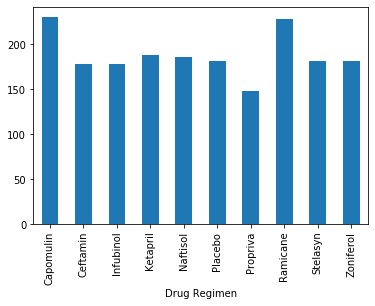

In [13]:
bar_plot1.plot.bar()



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

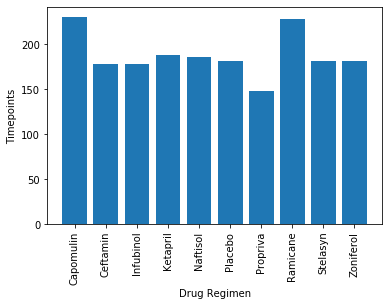

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(bar_plot1.index, bar_plot1.values)
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
plt.xticks(rotation='vertical')



In [15]:
pie_chart1=final_df['Sex'].value_counts()
print(pie_chart1)

Male      958
Female    922
Name: Sex, dtype: int64


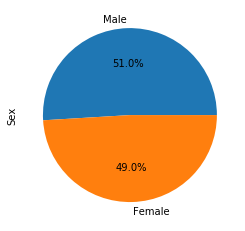

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_chart1.plot.pie(autopct='%1.1f%%')


([<matplotlib.patches.Wedge at 0x7f8cd2084b90>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

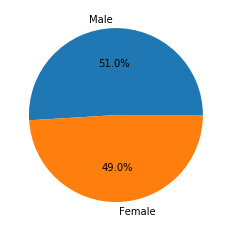

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pie_chart1, labels=('Male', 'Female'), autopct='%1.1f%%')

## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepointdf = pd.DataFrame(final_df.groupby(['Mouse ID'])['Timepoint'].max())

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
finaldf2 = pd.merge(final_df, timepointdf, on=('Mouse ID', 'Timepoint'))
finaldf2.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
Tumor_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatment_list:
    values = finaldf2['Tumor Volume (mm3)'] 
    Tumor_volume_list.append(values)
    
    Tumor_volume = finaldf2.loc[finaldf2['Drug Regimen']==drug, ['Tumor Volume (mm3)']]
    Tumor_volume_list.append(Tumor_volume)
    lower_quartiles = Tumor_volume.quantile(.25)
    upper_quartiles = Tumor_volume.quantile(.75)
    lower_quartile = lower_quartiles[0]
    upper_quartile = upper_quartiles[0]
    
    IQR = upper_quartile - lower_quartile
    print(f'IQR for {drug}: {IQR}')
    lower_bound = lower_quartile - (1.5*IQR)
    upper_bound = upper_quartile + (1.5*IQR)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
    outliers= (values.loc[(finaldf2['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (finaldf2['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'number of {drug} outliers: {outliers}')
          
    
    upper_outlier = Tumor_volume.loc[Tumor_volume['Tumor Volume (mm3)']>upper_bound]
    lower_outlier = Tumor_volume.loc[Tumor_volume['Tumor Volume (mm3)']<lower_bound]
    

    
    
        
     # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
number of Capomulin outliers: 146
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
number of Ramicane outliers: 132
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
number of Infubinol outliers: 24
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
number of Ceftamin outliers: 2


{'whiskers': [<matplotlib.lines.Line2D at 0x7f8cd2122dd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8cd21268d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8cd20ce8d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8cd2122e90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8cd212d850>],
 'means': []}

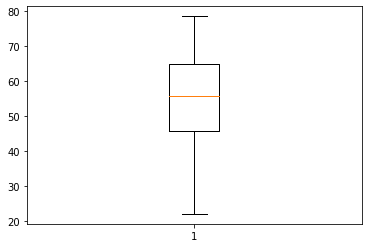

In [20]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(values)


## Line and Scatter Plots

Text(0.5, 1.0, 'Treatment of mouse x401 with Capomulin')

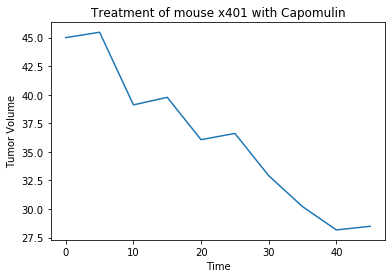

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = combined_data.loc[combined_data['Mouse ID'] == 'x401']
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'])
plt.xlabel('Time')
plt.ylabel('Tumor Volume')
plt.title('Treatment of mouse x401 with Capomulin')


Text(0, 0.5, 'Tumor Volume (mm3)')

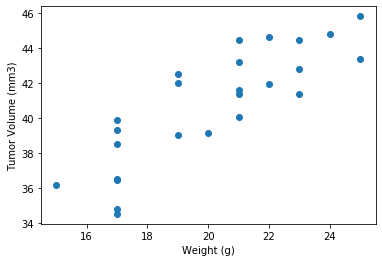

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin = clean_df.loc[clean_df['Drug Regimen']=='Capomulin']
average = capomulin.groupby('Mouse ID').mean()

plt.scatter(average['Weight (g)'],average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')



## Correlation and Regression

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = round(st.pearsonr(average['Weight (g)'], average["Tumor Volume (mm3)"])[0], 2)
print(correlation)
regression = st.linregress(average['Weight (g)'], average["Tumor Volume (mm3)"])
print(regression)






0.84
LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)


Text(0, 0.5, 'Tumor Volume (mm3)')

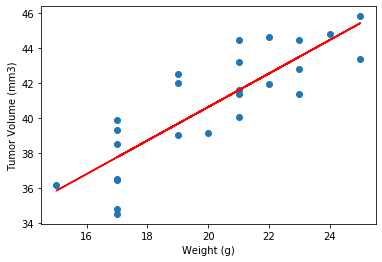

In [25]:
x_values=average['Weight (g)']
y_values=average["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
